In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.optimize import minimize
from pymoode.algorithms import GDE3
from pymoode.survival import RankAndCrowding

In [2]:
from pyrecorder.recorder import Recorder
from pyrecorder.writers.video import Video
from pyrecorder.writers.gif import GIF
from pyrecorder.converters.matplotlib import Matplotlib

In [3]:
problem = get_problem("tnk")
pf = problem.pareto_front()

In [4]:
SEED = 12

In [5]:
gde3 = GDE3(
    pop_size=50, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9),
    survival=RankAndCrowding(crowding_func="pcd")
)

In [6]:
res = minimize(problem, gde3, ('n_gen', 200), seed=SEED)

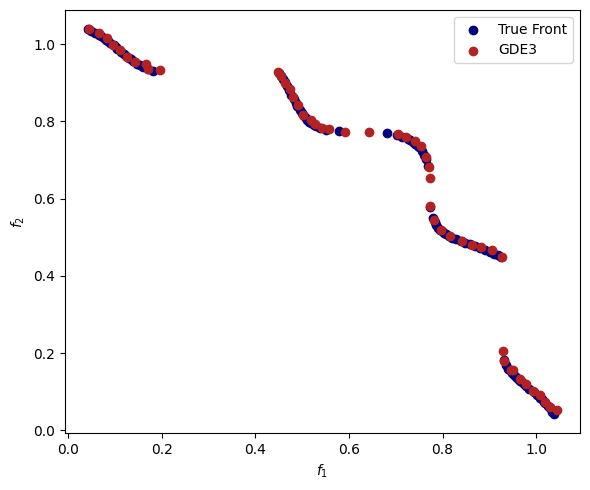

In [7]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
fig.patch.set_facecolor('white')
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res.F[:, 0], res.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.savefig("../images/tnk_gde3.png")
plt.show()

In [8]:
problem = get_problem("dtlz2")
pf = problem.pareto_front()

In [9]:
gde3mnn = GDE3(
    pop_size=150, variant="DE/rand/1/bin", F=(0.0, 1.0), CR=0.2,
    survival=RankAndCrowding(crowding_func="mnn")
    )

In [10]:
res_dtlz2 = minimize(problem, gde3mnn, ('n_gen', 250), seed=SEED)

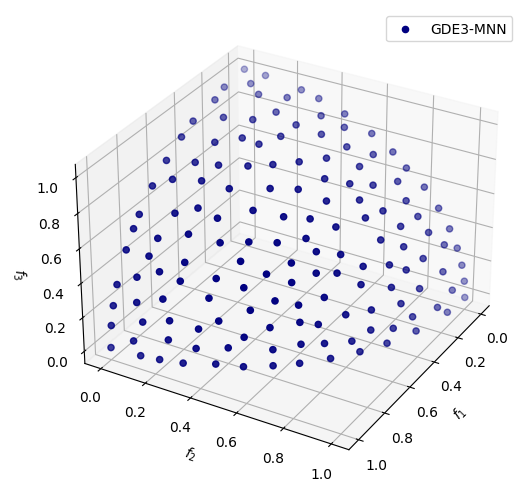

In [11]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100, subplot_kw={'projection':'3d'})

fig.patch.set_facecolor('white')

ax.scatter(res_dtlz2.F[:, 0], res_dtlz2.F[:, 1], res_dtlz2.F[:, 2],
           color="navy", label="GDE3-MNN", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()
plt.savefig("../images/gde3mnn_example.png")
plt.show()

In [12]:
writer = GIF("../images/gde3mnn_example.gif", duration=0.1)

with Recorder(writer, converter=Matplotlib(dpi=100)) as rec:

    for azim in np.linspace(30, 390, 120):
        
        fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})
        
        fig.patch.set_facecolor('white')

        ax.scatter(res_dtlz2.F[:, 0], res_dtlz2.F[:, 1], res_dtlz2.F[:, 2],
                color="navy", label="GDE3-MNN", marker="o")
        
        ax.view_init(elev=25, azim=azim)

        ax.set_xlabel("$f_1$")
        ax.set_ylabel("$f_2$")
        ax.set_zlabel("$f_3$")
        ax.legend()
        fig.tight_layout()
        
        rec.record()